# Dataset : Icons-50

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
%matplotlib inline

In [2]:
! unzip 35130_47677_compressed_Icons-50.npy.zip

Archive:  35130_47677_compressed_Icons-50.npy.zip
  inflating: Icons-50.npy            


In [3]:
icons = np.load('Icons-50.npy',allow_pickle=True).item()

In [4]:
data = icons['image']
y = np.array(icons['class'])
X = np.rollaxis(data,1,4)
X= X/255

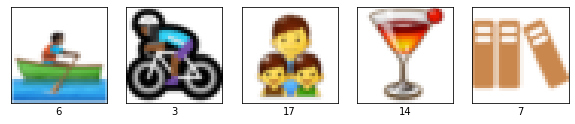

In [5]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i],)
    plt.xlabel(y[i])
plt.show()

In [6]:
X = X.reshape(X.shape[0],3072)

# Shadow Model
## Softmax

In [7]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.5, random_state=42)

In [8]:
softRegr=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000, penalty='l2')
softRegr.fit(X_train, y_train.ravel())
y_pred=softRegr.predict(X_test)

/media/lalit/Lalit/Environments/dl-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
y_tr = softRegr.predict(X_train)
train_acc = np.mean(y_train == y_tr)
test_acc=np.mean(y_test == y_pred)

print("Trainig Accuracy : {}, Testing Accuracy : {}".format(train_acc, test_acc))

Trainig Accuracy : 0.9996, Testing Accuracy : 0.6716


In [10]:
y_out=softRegr.predict_proba(X_test)
y_in=softRegr.predict_proba(X_train)

In [11]:
y_in_sorted=np.sort(y_in)
y_in_top3=y_in_sorted[:, 47:]
y_out_sorted=np.sort(y_out)
y_out_top3=y_out_sorted[:, 47:]

In [12]:
din=np.hstack((y_in_top3, np.ones((y_in_top3.shape[0],1))))
dout=np.hstack((y_out_top3, np.zeros((y_out_top3.shape[0],1))))
dt=np.vstack((din,dout))
df=pd.DataFrame(dt)
df.to_csv("sh_softmax.csv", index=False, header=True)

# Target Model
## Random Forest

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X2, y2, test_size=0.5, random_state=42)

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
mod = ExtraTreesClassifier(n_estimators=100, max_features=50)
mod.fit(Xtrain,ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=50,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [14]:
y_tr = mod.predict(Xtrain)
y_te = mod.predict(Xtest)

train_acc=accuracy_score(ytrain, y_tr)
test_acc=accuracy_score(ytest, y_te)

print("Trainig Accuracy : {}, Testing Accuracy : {}".format(train_acc, test_acc))

Trainig Accuracy : 1.0, Testing Accuracy : 0.7476


In [15]:
y_in=mod.predict_proba(Xtrain)
y_out=mod.predict_proba(Xtest)

In [16]:
y_in_sorted=np.sort(y_in)
y_in_top3=y_in_sorted[:, 47:]
y_out_sorted=np.sort(y_out)
y_out_top3=y_out_sorted[:, 47:]

In [21]:
din=np.hstack((y_in_top3, np.ones((y_in_top3.shape[0],1))))
dout=np.hstack((y_out_top3, np.zeros((y_out_top3.shape[0],1))))
dt=np.vstack((din,dout))
df=pd.DataFrame(dt)
df.to_csv("sh_forest.csv", index=False, header=True)